In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
df = pd.read_csv('datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Answer 1

# Display summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


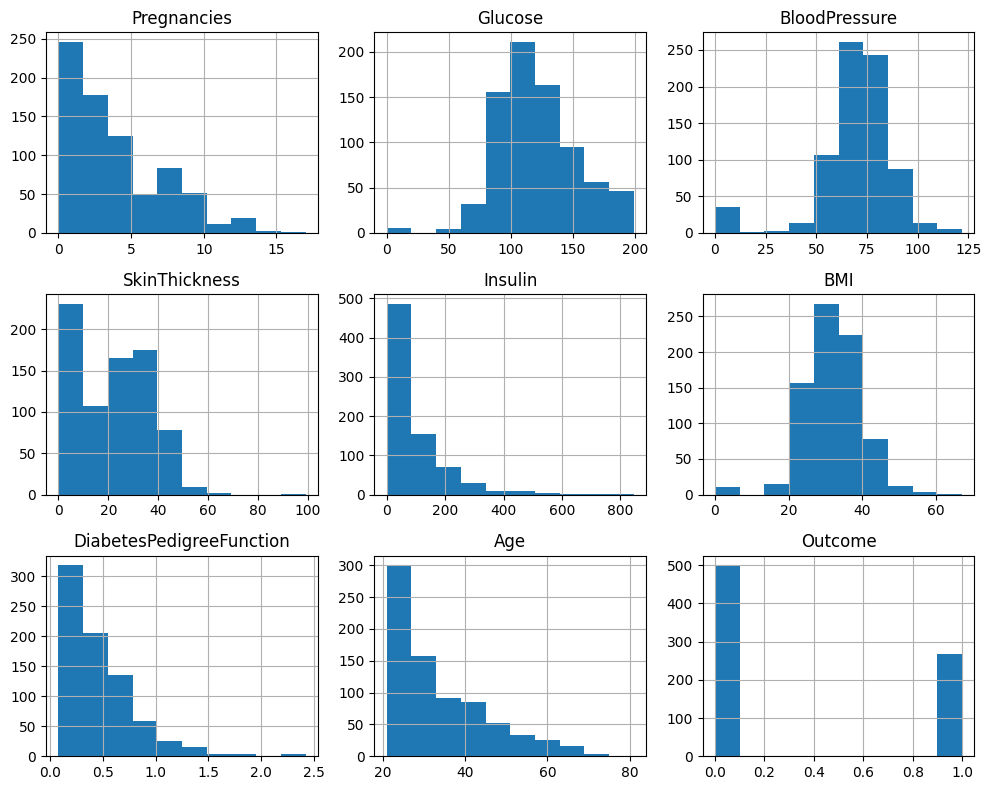

In [ ]:
# distribution of the data
df.hist(figsize=(10, 8))
plt.tight_layout()

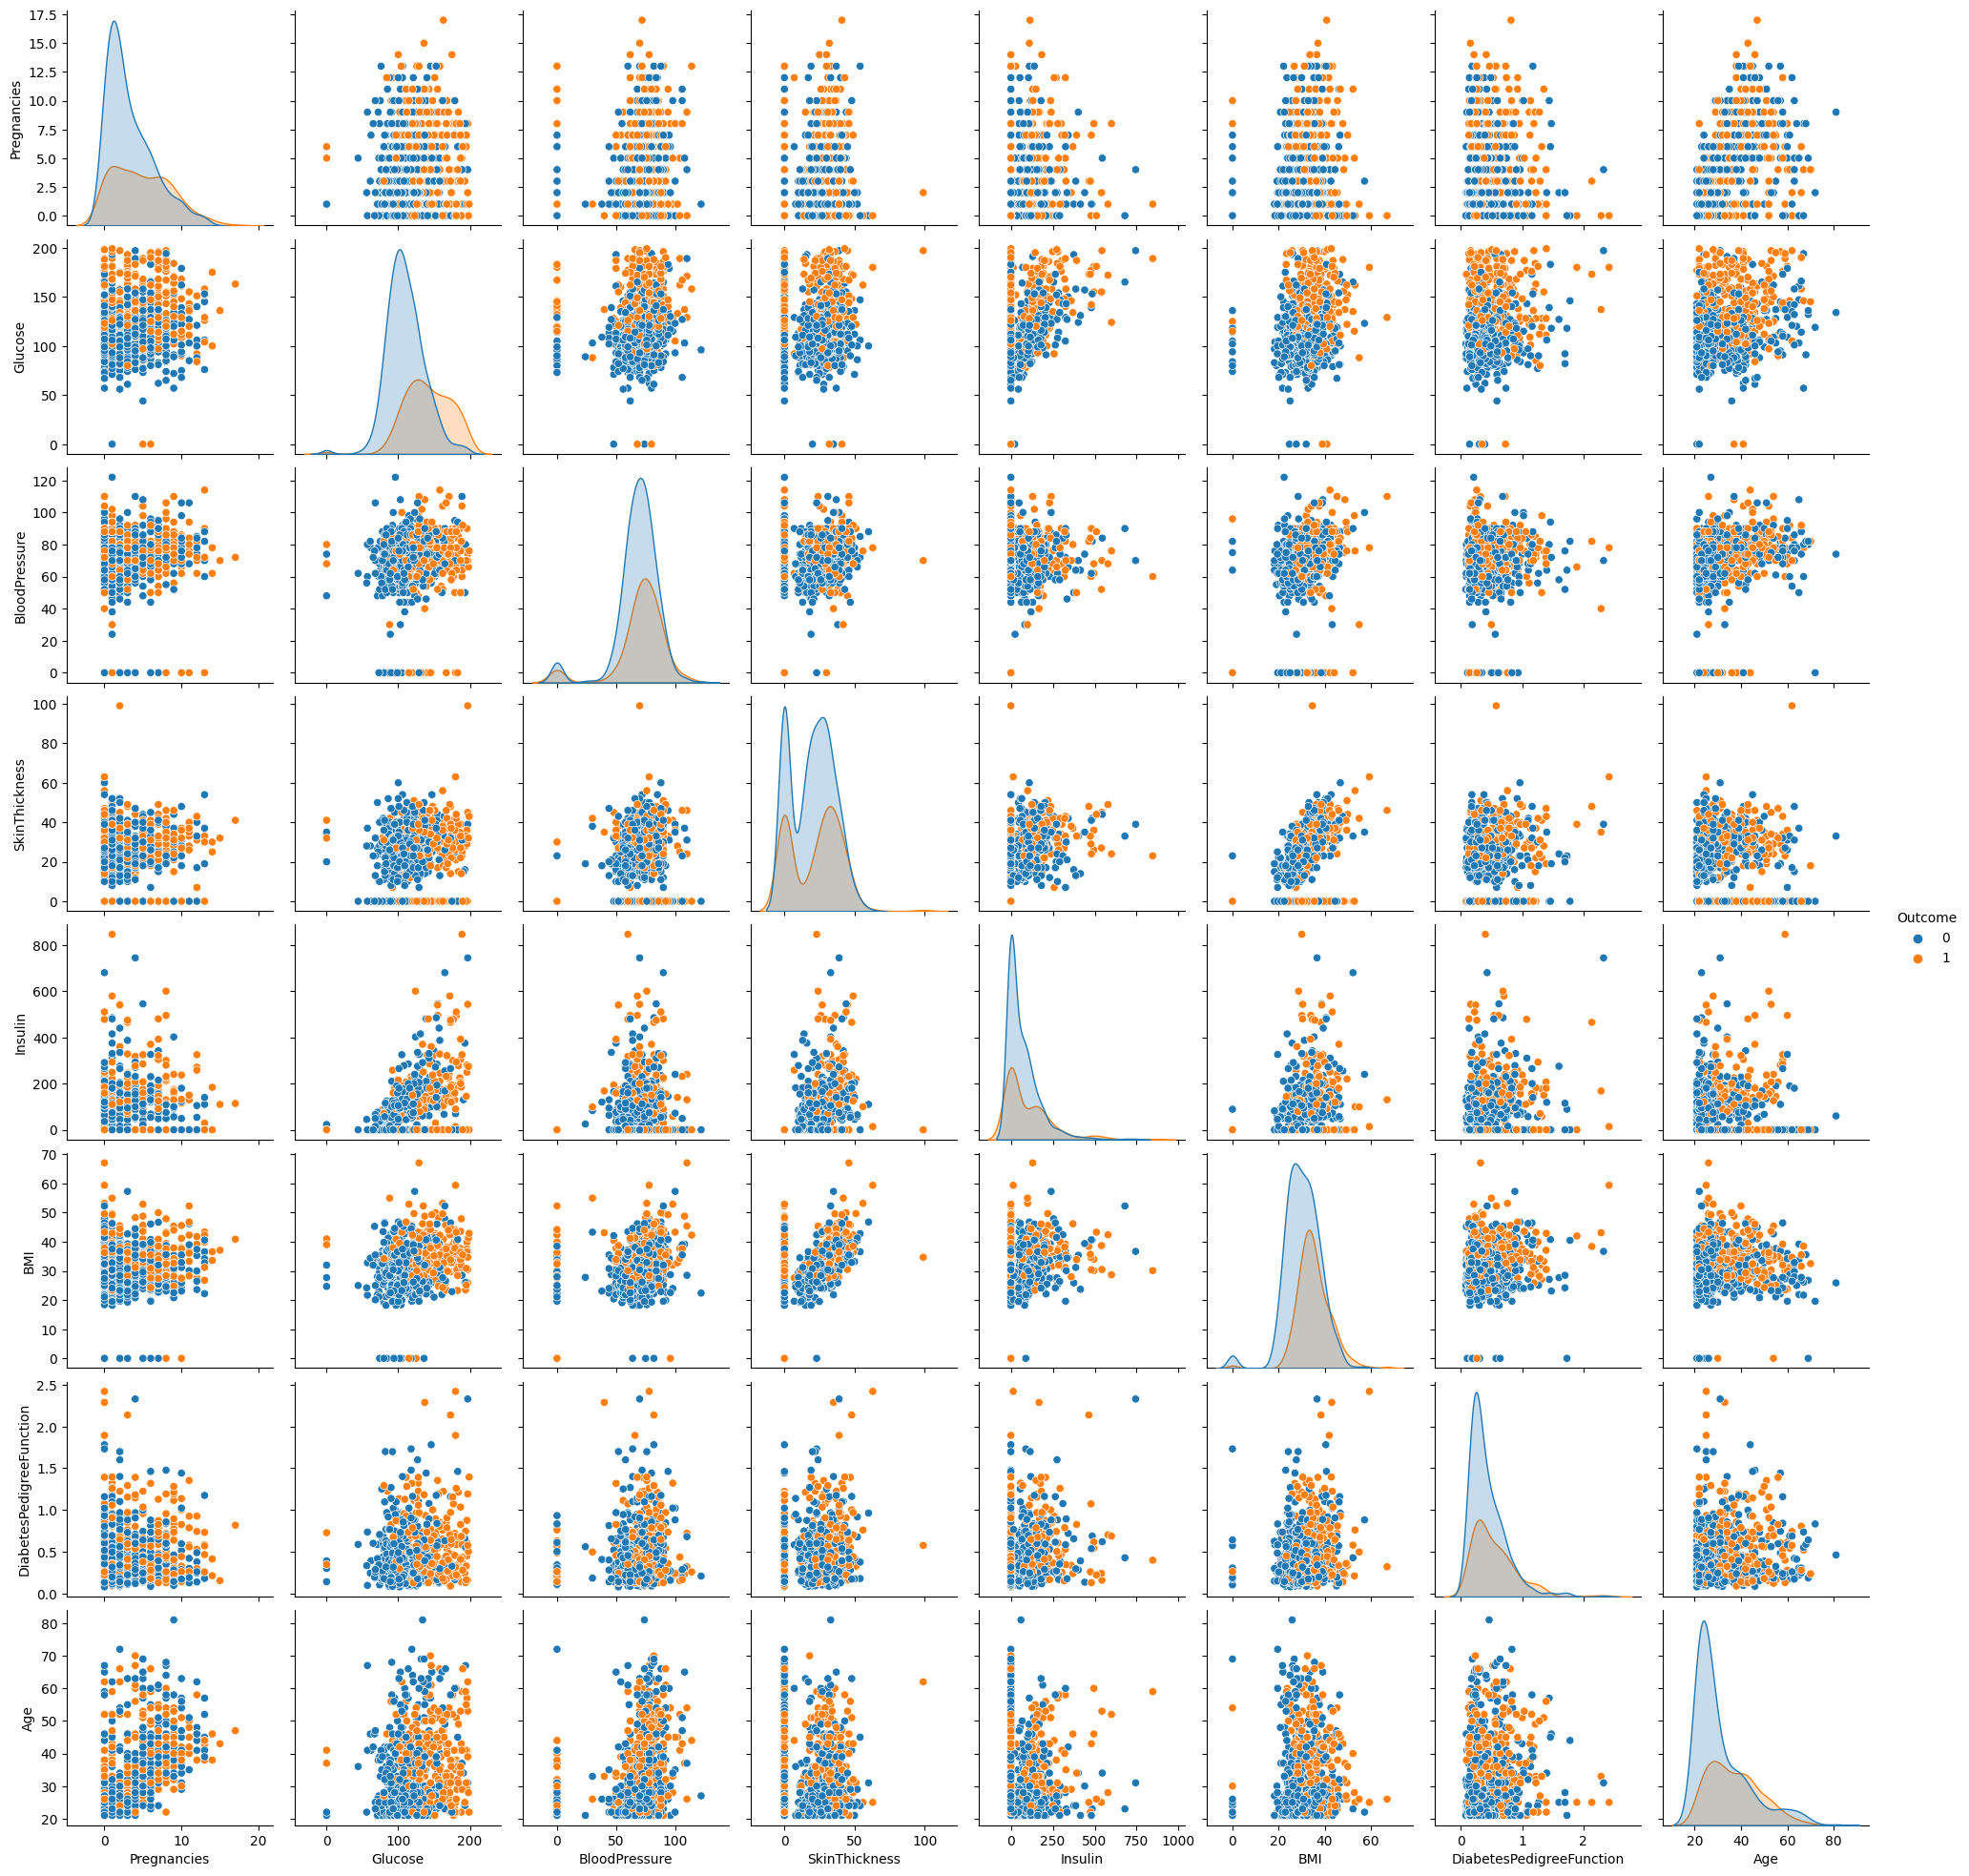

In [ ]:
# relationships between variables
sns.pairplot(df, hue='Outcome')

<Axes: >

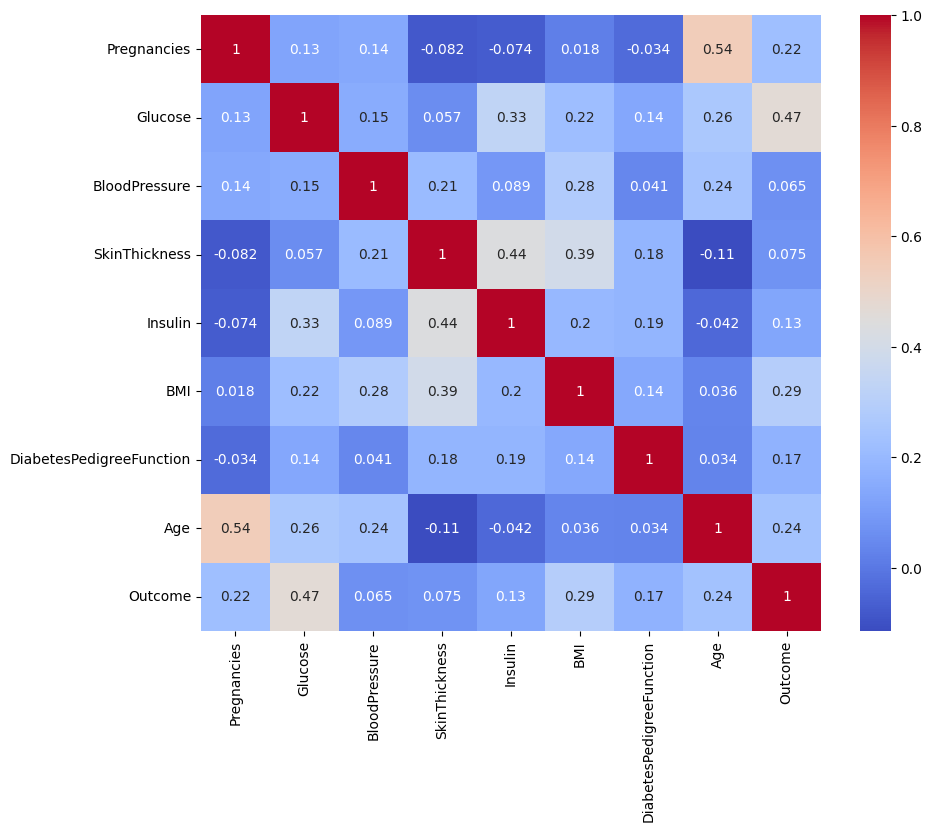

In [ ]:
# correlation between variables
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
# Answer 2

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# dataset is already cleaned

In [ ]:
# Answer 3

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and test sets
# Set the random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [ ]:
# Answer 4

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters and their possible values for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the decision tree model using the best hyperparameters
best_tree_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

Accuracy: 0.7857142857142857
Precision: 0.7391304347826086
Recall: 0.6181818181818182
F1 Score: 0.6732673267326733
Confusion Matrix:
 [[87 12]
 [21 34]]
ROC AUC Score: 0.8069788797061525


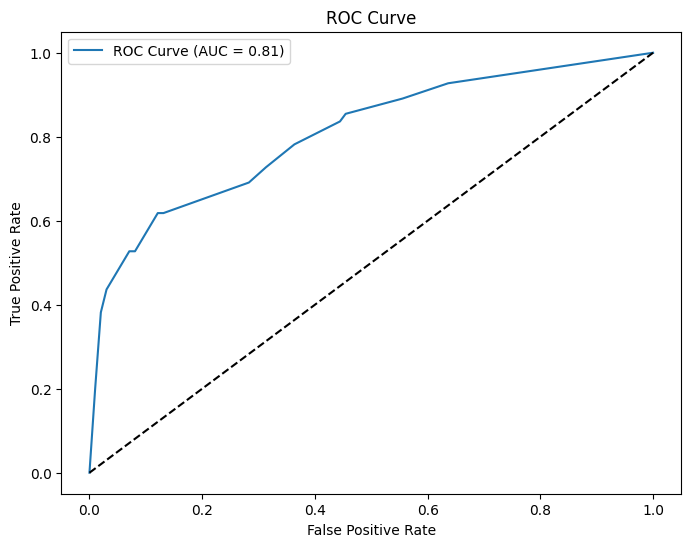

In [ ]:
# Answer 5

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_tree_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC score
y_probs = best_tree_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


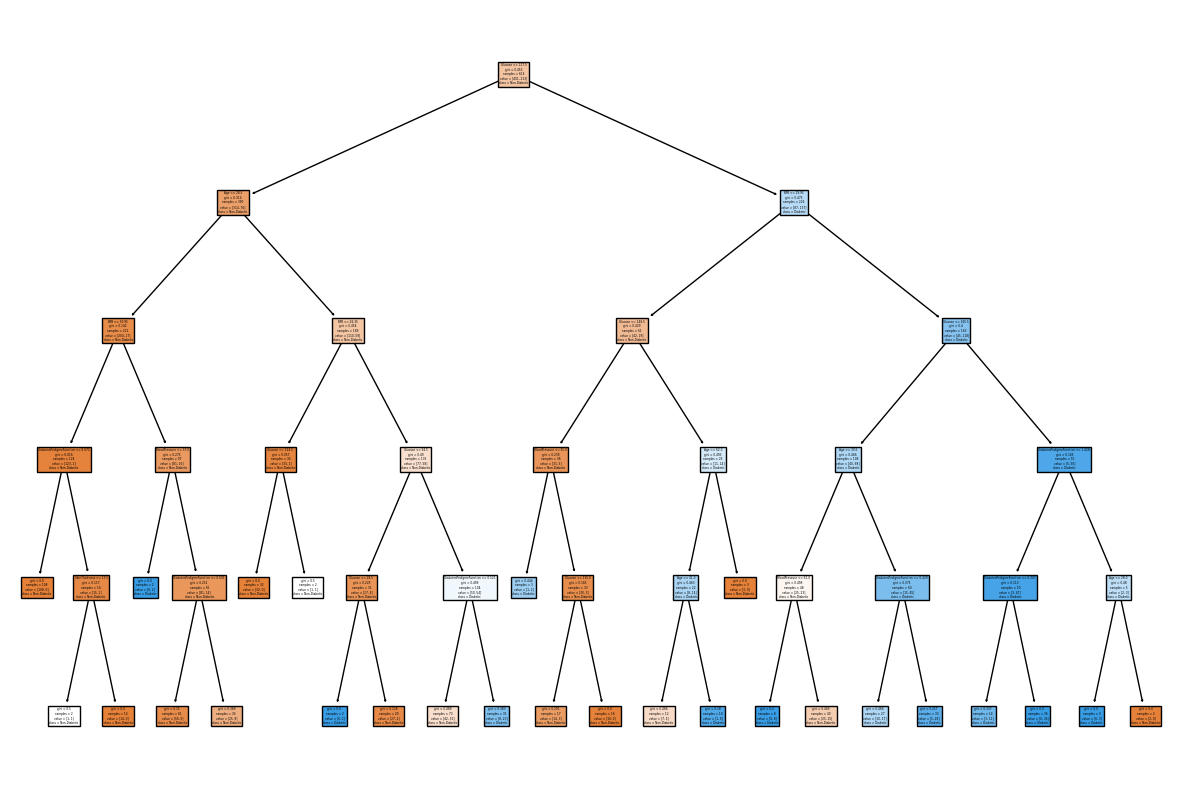

Most important features:
Glucose: 0.5019
BMI: 0.1838
Age: 0.1748
BloodPressure: 0.0686
DiabetesPedigreeFunction: 0.0649
SkinThickness: 0.0061
Pregnancies: 0.0000
Insulin: 0.0000


In [ ]:
# Answer 6

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree's structure
plt.figure(figsize=(15, 10))
plot_tree(best_tree_classifier, filled=True, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.show()

# Find the most important features
feature_importances = best_tree_classifier.feature_importances_
important_features = [(feature, importance) for feature, importance in zip(X.columns, feature_importances)]
important_features.sort(key=lambda x: x[1], reverse=True)

print("Most important features:")
for feature, importance in important_features:
    print(f"{feature}: {importance:.4f}")


In [ ]:
# Answer 7

# Create a copy of the test set and modify a specific feature
sensitivity_data = X_test.copy()
feature_to_modify = 'Glucose'  # Replace with the feature you want to test
sensitivity_data[feature_to_modify] += 10  # Increase the feature value by 10

# Predict using the modified data
sensitivity_predictions = best_tree_classifier.predict(sensitivity_data)

# Compare the predictions with the original ones
sensitivity_accuracy = accuracy_score(y_test, sensitivity_predictions)
print(f"Sensitivity Analysis - Accuracy: {sensitivity_accuracy:.4f}")


Sensitivity Analysis - Accuracy: 0.7987


In [ ]:
# Create a copy of the test set and modify multiple features for a scenario
scenario_data = X_test.copy()
scenario_data['Glucose'] += 20
scenario_data['BMI'] -= 5

# Predict using the scenario data
scenario_predictions = best_tree_classifier.predict(scenario_data)

# Compare the predictions with the original ones
scenario_accuracy = accuracy_score(y_test, scenario_predictions)
print(f"Scenario Testing - Accuracy: {scenario_accuracy:.4f}")


Scenario Testing - Accuracy: 0.7143
